In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('nobel.csv')

# 1...

In [19]:
def Question_1():
    return df.head(3)
Question_1()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_winner,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900


# 2...

In [3]:
def Question_2():
    sex = df.value_counts('sex').idxmax()
    country = df.value_counts('birth_country').idxmax()
    return sex,country
Question_2()

('Male', 'United States of America')

# 3...

In [11]:
def Question_3():    
    df['usa_winner'] = df['birth_country'] == 'United States of America'
    df['decade'] = df['year'].apply(lambda year: year - (year % 10))
    USA_Winners = df.groupby(['decade'], as_index=False)['usa_winner'].mean()
    return USA_Winners
Question_3()

,decade,usa_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


# 4...

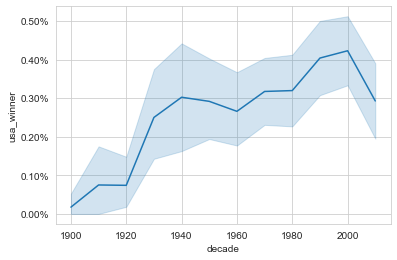

In [18]:
def Question_4():
    from matplotlib.ticker import PercentFormatter
    return sns.lineplot(x='decade', y='usa_winner', data=df).yaxis.set_major_formatter(PercentFormatter())
Question_4()

# 5...

In [26]:
def Question_5():   
    df['female_winner'] = df['sex'] == 'Female'
    female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
    return female_winners['category'].value_counts()
Question_5()

Medicine      12
Chemistry     12
Literature    12
Peace         12
Physics       12
Economics      6
Name: category, dtype: int64

# 6...

In [67]:
def Question_6(): 
    return df[df['sex'] == 'Female'].nsmallest(1,'year').iloc[:,[1,7]]
Question_6()

,category,full_name
19,Physics,"Marie Curie, née Sklodowska"


# 7...

In [96]:
def Question_7():
    return df.groupby('full_name').filter(lambda x: len(x)>1).loc[:,'full_name']
Question_7()

19                           Marie Curie, née Sklodowska
62                           Marie Curie, née Sklodowska
89     Comité international de la Croix Rouge (Intern...
215    Comité international de la Croix Rouge (Intern...
278                                   Linus Carl Pauling
283    Office of the United Nations High Commissioner...
298                                         John Bardeen
306                                     Frederick Sanger
340                                   Linus Carl Pauling
348    Comité international de la Croix Rouge (Intern...
424                                         John Bardeen
505                                     Frederick Sanger
523    Office of the United Nations High Commissioner...
Name: full_name, dtype: object

# 11...

In [111]:
def Question_11():
    df['birth_date'] =  pd.to_datetime(df['birth_date'] )
    df['age'] = df['year'] - df['birth_date'].dt.year
    return df.nsmallest(1, 'age').loc[:,'full_name']
Question_11()

885    Malala Yousafzai
Name: full_name, dtype: object